In [1]:
# Import the modules
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn import metrics



In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/gld_price_data.csv")
df_gld = pd.read_csv(file_path)

# Review the DataFrame
df_gld.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# Describe the data to see count/averages min and max.
df_gld.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [4]:
#check data types to update as needed
df_gld.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [5]:
# convert the date column from an object to datetime object
df_gld["Date"] = pd.to_datetime(df_gld["Date"], format='%m/%d/%Y')

In [6]:
# check types again to confirm date changed to datetime
df_gld.dtypes

Date       datetime64[ns]
SPX               float64
GLD               float64
USO               float64
SLV               float64
EUR/USD           float64
dtype: object

In [7]:
# plot the data to see the distributions of values
df_gld.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_gld_scaled = StandardScaler().fit_transform(df_gld[["SPX", "USO", "SLV", "EUR/USD"]])

# Diplay the first five rows of the scaled data
df_gld_scaled[0:5]

array([[-0.39914541,  2.38880956, -0.6917197 ,  1.42975293],
       [-0.39914541,  2.38368652, -0.67691224,  1.45103511],
       [-0.46760428,  2.32938091, -0.69355301,  1.45864621],
       [-0.45883729,  2.23665206, -0.70962968,  1.40395428],
       [-0.50891476,  2.26534158, -0.63390007,  2.07914451]])

In [9]:
# Create a DataFrame with the scaled data
df_gld_scaled = pd.DataFrame(
    df_gld_scaled,
    columns=["SPX", "USO", "SLV", "EUR/USD"])

# Copy the "GLD" and "Date" columns from the original data
df_gld_scaled[["GLD", "Date"]] = df_gld[["GLD", "Date"]]

# Set the date as the index
df_gld_scaled.set_index("Date", inplace = True)

df_gld_scaled.head()

,SPX,USO,SLV,EUR/USD,GLD
Date,,,,,
2008-01-02,-0.399145,2.388810,-0.691720,1.429753,84.860001
2008-01-03,-0.399145,2.383687,-0.676912,1.451035,85.570000
2008-01-04,-0.467604,2.329381,-0.693553,1.458646,85.129997
2008-01-07,-0.458837,2.236652,-0.709630,1.403954,84.769997
2008-01-08,-0.508915,2.265342,-0.633900,2.079145,86.779999


In [10]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_gld_scaled["GLD"]

# Separate the X variable, the features
X = df_gld_scaled.drop(columns=["GLD"], axis=1)

In [11]:
# Review the y variable Series
print(y)

Date
2008-01-02     84.860001
2008-01-03     85.570000
2008-01-04     85.129997
2008-01-07     84.769997
2008-01-08     86.779999
                 ...    
2018-05-08    124.589996
2018-05-09    124.330002
2018-05-10    125.180000
2018-05-14    124.489998
2018-05-16    122.543800
Name: GLD, Length: 2290, dtype: float64


In [12]:
# Review the X variable DataFrame
X.head()

,SPX,USO,SLV,EUR/USD
Date,,,,
2008-01-02,-0.399145,2.388810,-0.691720,1.429753
2008-01-03,-0.399145,2.383687,-0.676912,1.451035
2008-01-04,-0.467604,2.329381,-0.693553,1.458646
2008-01-07,-0.458837,2.236652,-0.709630,1.403954
2008-01-08,-0.508915,2.265342,-0.633900,2.079145


In [13]:
#check for null values and counts
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2290 entries, 2008-01-02 to 2018-05-16
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   USO      2290 non-null   float64
 2   SLV      2290 non-null   float64
 3   EUR/USD  2290 non-null   float64
dtypes: float64(4)
memory usage: 89.5 KB


In [14]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [15]:
y_train.count()

1717

In [16]:
y_test.count()

573

In [17]:
# Instantiate the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=200)

In [18]:
# Fit the model using training data
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [19]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)

In [20]:
# Calculate the R-Squared score from the predicted value
r_score = metrics.r2_score(y_test, y_pred)
print("R squared: ", r_score)

R squared:  0.9873339987308283


In [21]:
# Calculate the mean squared error and absolute error
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 6.74
Mean Absolute Error: 1.36


In [22]:
# Convert Y_test values into a list to plot
y_test = list(y_test)

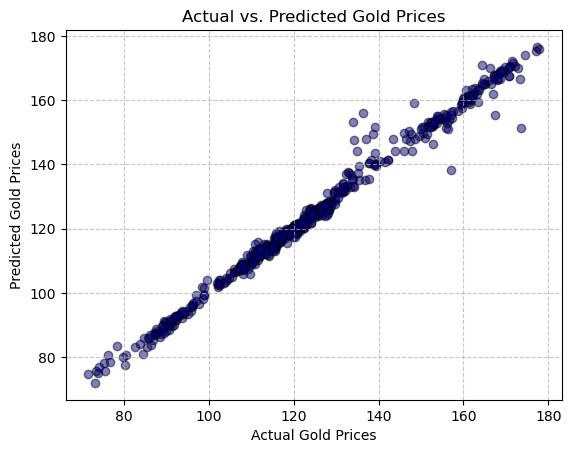

In [43]:
#Plot the actual prices from the data compared to the model predicted data
plt.scatter(y_test, y_pred, c='darkblue', alpha=0.5, edgecolors='black')
plt.xlabel('Actual Gold Prices')
plt.ylabel('Predicted Gold Prices')
plt.title('Actual vs. Predicted Gold Prices')
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('Solarize_Light2')
plt.style.use('default')

# Save the plot as an image
plt.savefig('images/actual_vs_predicted.jpg')

#display the plot
plt.show()

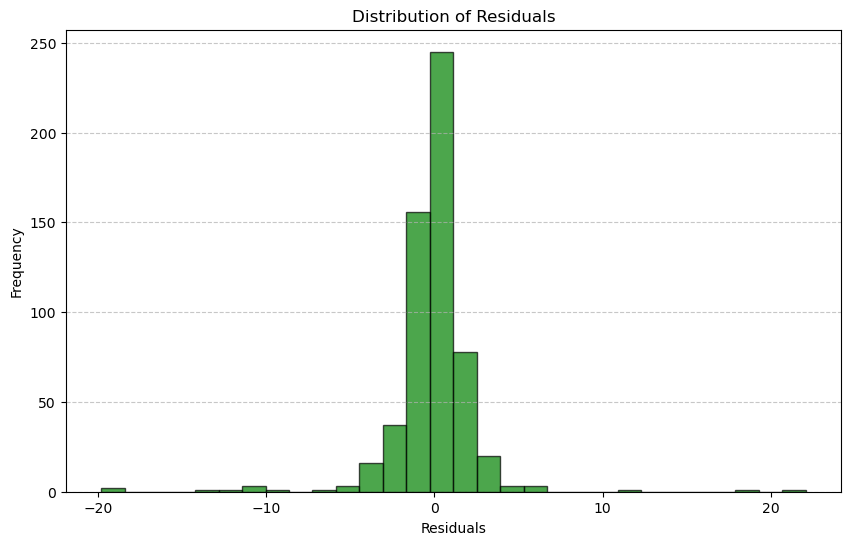

In [44]:
# Show the distribution of the residual (difference between actual and predicted gold prices)
residuals = y_test - y_pred
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the histogram with grid lines
plt.hist(residuals, bins=30, edgecolor='black', color='green', alpha=0.7)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.style.use('default')

# Save the plot as an image
plt.savefig('images/residual_distribution.jpg')

# Show the plot
plt.show()

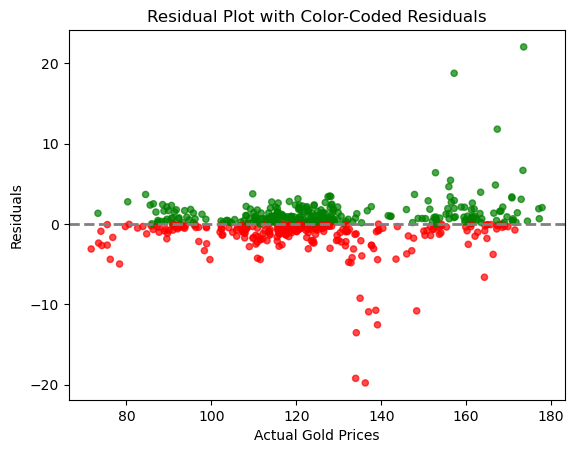

In [45]:
# Plot the residuals (diff between actual and predicted gold prices) by the gold price. 
colors = ['green' if x >= 0 else 'red' for x in residuals]
plt.scatter(y_test, residuals, s=20, alpha=0.7, c=colors)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=2)
plt.xlabel('Actual Gold Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot with Color-Coded Residuals')
plt.style.use('default')

# Save the plot as an image
plt.savefig('images/residuals_plot.jpg')

#display the plot
plt.show()

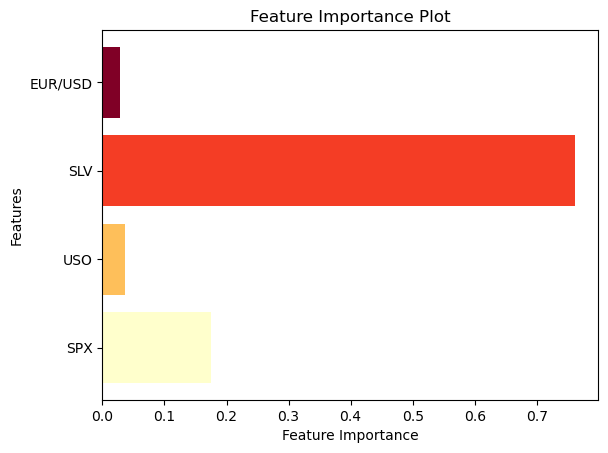

In [46]:
# Plot the 4 features and their importance to the prediction model 
importances = model.feature_importances_
feature_names = X.columns

# Generate a list of distinct colors for each feature
colors = plt.cm.YlOrRd(np.linspace(0, 1, len(feature_names)))

plt.barh(feature_names, importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.style.use('default')

# Save the plot as an image
plt.savefig('images/features.jpg')

#display plot
plt.show()

In [27]:
# Re-run the model using a different random state and test size distribution.
# Assign a random_state of 2 to the function
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.30, random_state=2)

In [28]:
# Instantiate the Random Forest Regressor model
model2 = RandomForestRegressor(n_estimators=200)

In [29]:
# Fit the model using training data
model2.fit(X_train2,y_train2)

RandomForestRegressor(n_estimators=200)

In [30]:
# Make a prediction using the testing data
y_pred2 = model.predict(X_test2)

In [31]:
# Calculate the R-Squared score from the predicted value
r_score2 = metrics.r2_score(y_test2, y_pred2)
print("R squared: ", r_score2)

R squared:  0.9961694097226711


In [33]:
# Calculate the mean squared error and absolute error
mse2 = metrics.mean_squared_error(y_test2, y_pred2)
mae2 = metrics.mean_absolute_error(y_test2, y_pred2)

print(f'Mean Squared Error: {mse2:.2f}')
print(f'Mean Absolute Error: {mae2:.2f}')

Mean Squared Error: 1.95
Mean Absolute Error: 0.67
